In [1]:

import os
import sys

import numpy as np
import pandas as pd
import sklearn
from sqlalchemy import create_engine, select
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
from sqlalchemy.sql import func

# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
from source.build_data.models import models, Base as InputsBase



inputs_engine = create_engine('sqlite:///sql/data.db')
InputsSession = sessionmaker(bind=inputs_engine)
inputs_session = InputsSession()
InputsBase.metadata.create_all(inputs_engine)

query = select(
    models.Variables.date,
    models.Reservoir.level,
    models.Reservoir.streamflow,
    func.sum(models.Variables.precipitation).label('precipitation'),
    func.avg(models.Variables.temperature).label('temperature'),
    func.sum(models.Variables.evaporation).label('evaporation'),
    func.avg(models.Variables.surface_runoff).label('surface_runoff'),
    models.Coordinate.river_id
).\
    join(models.Variables.coordinate).\
    join(models.Reservoir, models.Variables.date == models.Reservoir.date).\
    group_by(models.Variables.date).\
    group_by(models.Coordinate.river_id)




In [2]:
df = pd.read_sql(query, inputs_session.bind)

df

,date,level,streamflow,precipitation,temperature,evaporation,surface_runoff,river_id
0,1999-01-01,560.19,854.00,671.024707,27.368151,393.536845,4.099641e-01,1
1,1999-01-01,560.19,854.00,465.102216,26.788190,450.157972,2.201662e-01,2
2,1999-01-01,560.19,854.00,66.869122,27.946012,59.962737,1.538050e-01,3
3,1999-01-01,560.19,854.00,52.767011,27.666216,48.419736,1.331286e-01,4
4,1999-01-01,560.19,854.00,123.202071,27.475916,120.222209,1.135617e-01,5
...,...,...,...,...,...,...,...,...
27583,2005-12-30,568.35,881.33,0.000000,26.716494,112.834370,0.000000e+00,7
27584,2005-12-30,568.35,881.33,0.000000,26.095913,212.261747,1.160423e-10,8
27585,2005-12-30,568.35,881.33,1503.795052,24.308467,1937.032651,7.842172e-02,9
27586,2005-12-30,568.35,881.33,4849.088002,23.603858,3396.991142,2.253774e-01,10


In [3]:
pivoted_df = df.pivot(index=["date", "level", "streamflow"], columns="river_id")

pivoted_df

precipitation                           \
river_id                                1            2           3    
date       level  streamflow                                          
1999-01-01 560.19 854.00        671.024707   465.102216   66.869122   
1999-01-02 560.28 1128.00       793.719631   489.695138  110.695258   
1999-01-03 560.35 1021.00      1098.730582  1073.648047  191.857469   
1999-01-04 560.47 1307.00       966.199458   925.685374  111.636958   
1999-01-05 560.62 1481.00       273.113279   359.294498    2.801905   
...                                    ...          ...         ...   
2005-12-26 568.51 1068.11        62.192756   272.506781    0.128756   
2005-12-27 568.44 1027.44       140.071616   134.625157   28.822960   
2005-12-28 568.40 902.97        683.323431  1267.992157   80.176759   
2005-12-29 568.38 1106.56      1589.087376  2039.549887  270.658218   
2005-12-30 568.35 881.33         18.549537    39.900494    0.000000   

                                                                              \
river_id                              4           5           6           7    
date       level  streamflow                                                   
1999-01-01 560.19 854.00       52.767011  123.202071  110.744887  294.096477   
1999-01-02 560.28 1128.00      85.585158  212.667287  156.652986  442.018330   
1999-01-03 560.35 1021.00     135.788901  301.326610  218.532570  296.882969   
1999-01-04 560.47 1307.00      87.936838  219.241251  183.210818  134.095318   
1999-01-05 560.62 1481.00       7.419221   27.256007   21.757371  153.764811   
...                                  ...         ...         ...         ...   
2005-12-26 568.51 1068.11       0.728183    4.973414   26.787834    0.000000   
2005-12-27 568.44 1027.44      26.483711   67.049912   55.686758   62.191904   
2005-12-28 568.40 902.97       55.567427  139.098593  136.490363  127.424603   
2005-12-29 568.38 1106.56     204.444199  501.566561  414.706602  521.939386   
2005-12-30 568.35 881.33        0.000000    0.000000    0.000000    0.000000   

                                                                     ...  \
river_id                              8            9             10  ...   
date       level  streamflow                                         ...   
1999-01-01 560.19 854.00      445.446747  6007.045243   6989.364511  ...   
1999-01-02 560.28 1128.00     712.320556  6899.786777   8811.012701  ...   
1999-01-03 560.35 1021.00     630.266191  6684.855194  13625.547791  ...   
1999-01-04 560.47 1307.00     239.354739  3878.263500  16474.039613  ...   
1999-01-05 560.62 1481.00     180.616363  2183.574181   4520.910427  ...   
...                                  ...          ...           ...  ...   
2005-12-26 568.51 1068.11       0.005358   352.871528   7391.190548  ...   
2005-12-27 568.44 1027.44     120.094629  2920.598574   8587.581504  ...   
2005-12-28 568.40 902.97      299.923742  4448.426337  24823.384740  ...   
2005-12-29 568.38 1106.56     980.966684  6883.710537  19062.828853  ...   
2005-12-30 568.35 881.33        0.000000  1503.795052   4849.088002  ...   

                             surface_runoff                          \
river_id                                 2         3             4    
date       level  streamflow                                          
1999-01-01 560.19 854.00           0.220166  0.153805  1.331286e-01   
1999-01-02 560.28 1128.00          0.247559  0.415066  4.208309e-01   
1999-01-03 560.35 1021.00          0.461799  0.569603  4.967474e-01   
1999-01-04 560.47 1307.00          0.449394  0.244052  2.483944e-01   
1999-01-05 560.62 1481.00          0.086567  0.001172  4.046416e-03   
...                                     ...       ...           ...   
2005-12-26 568.51 1068.11          0.132323  0.000012  2.241300e-04   
2005-12-27 568.44 1027.44          0.003189  0.007080  7.337448e-03   
2005-12-28 568.40 902.97           0.421945  0.086313  8.438702e-02

In [26]:
normalized_df = pivoted_df.copy()
normalized_df = (pivoted_df-pivoted_df.min()) / (pivoted_df.max() - pivoted_df.min())
normalized_df.index.get_level_values('level')

Float64Index([560.19, 560.28, 560.35, 560.47, 560.62, 560.78,  560.9, 561.03,
              561.15, 561.25,
              ...
              568.66, 568.63, 568.59, 568.55, 568.55, 568.51, 568.44,  568.4,
              568.38, 568.35],
             dtype='float64', name='level', length=2508)

In [28]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(normalized_df, normalized_df.index.get_level_values('level'), test_size=0.3)
X_train2, X_test2, y_train2, y_test2 = train_test_split(normalized_df, normalized_df.index.get_level_values('streamflow'), test_size=0.3)

In [29]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
#from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
#from sklearn.metrics import mean_absolute_percentage_error

#explained_variance_score(y_pred, y_test, multioutput='raw_values')
#max_error(y_pred, y_test)
#mean_absolute_error(y_pred, y_test)
#mean_squared_error(y_pred, y_test)
#mean_squared_log_error(y_pred, y_test)
#mean_absolute_percentage_error(y_pred, y_test)

In [30]:
results = np.zeros(1000)
results2 = np.zeros(1000)
j = 0

for i in np.arange(0.1, 33, 0.5):
    regr = svm.SVR(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, C=i, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    temp = mean_squared_error(y_pred, y_test)
    results[j]= temp

    regr = svm.SVR(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, C=i, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
    regr.fit(X_train2, y_train2)
    y_pred2 = regr.predict(X_test2)
    temp2 = mean_squared_error(y_pred2, y_test2)
    results2[j]= temp2
    
    j = j+1

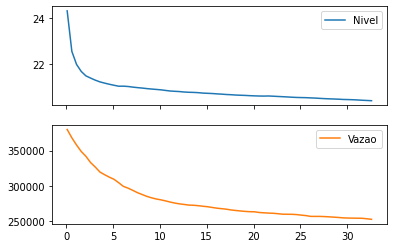

In [31]:
results = results[results != 0]
results2 = results2[results2 != 0]

df = pd.DataFrame({'Nivel': results, 'Vazao': results2}, 
                  index=np.arange(0.1, 33, 0.5))
lines = df.plot.line(subplots=True)


In [11]:
from sklearn.ensemble import RandomForestRegressor

results3 = np.zeros(1000)
results4 = np.zeros(1000)
j = 0

for i in np.arange(1, 100, 5):
    regr = RandomForestRegressor(max_depth=i, random_state=0)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    
    temp = mean_squared_error(y_pred, y_test2)
    results3[j]= temp
    
    regr = RandomForestRegressor(max_depth=i, random_state=0)
    regr.fit(X_train2, y_train2)
    y_pred2 = regr.predict(X_test)

    temp2 = mean_squared_error(y_pred2, y_test2)
    results4[j]= temp2
    
    j = j+1

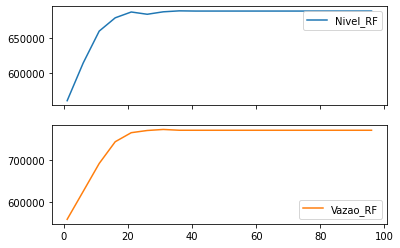

In [12]:
results3 = results3[results3 != 0]
results4 = results4[results4 != 0]

results3

df = pd.DataFrame({'Nivel_RF': results3, 'Vazao_RF': results4}, 
                  index=np.arange(1, 100, 5))
lines = df.plot.line(subplots=True)